<a href="https://colab.research.google.com/github/MaliheDahmardeh/project/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 


In [2]:
!ls

heart_2020_cleaned.csv	sample_data


In [3]:
heart_disease_df = pd.read_csv('heart_2020_cleaned.csv')

In [4]:
heart_disease_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [5]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
heart_disease_df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [7]:
heart_disease_df.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319785,No,31.93,No,Yes,No,0.0,0.0,No,Male,65-69,Hispanic,No,Yes,Good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
319787,No,36.54,No,No,No,7.0,0.0,No,Male,30-34,Hispanic,No,No,Good,9.0,No,No,No
319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [8]:
heart_disease_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# data cleaning

In [9]:
heart_disease_df.isnull()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
print(heart_disease_df.isnull().sum().sort_values(ascending=False))

HeartDisease        0
BMI                 0
KidneyDisease       0
Asthma              0
SleepTime           0
GenHealth           0
PhysicalActivity    0
Diabetic            0
Race                0
AgeCategory         0
Sex                 0
DiffWalking         0
MentalHealth        0
PhysicalHealth      0
Stroke              0
AlcoholDrinking     0
Smoking             0
SkinCancer          0
dtype: int64


In [11]:
heart_disease_df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [12]:
heart_disease_df.dropna()
heart_disease_df.fillna('non values', inplace =True)
heart_disease_df.drop_duplicates()
heart_disease_df.reset_index()

,index,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [13]:
heart_disease_df.reset_index()

,index,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [14]:
heart_disease_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [15]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [16]:
heart_disease_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

#Data Visualization

Data Heart Disease percentage

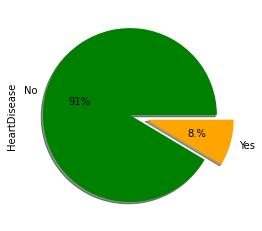

In [17]:
heart_disease_df['HeartDisease'].value_counts().plot.pie(explode=[0,0.2],autopct=lambda x: str(x)[:2] + '%', shadow =True, colors=('green','orange'))
plt.show()

Distribution of Male & Female in our Data

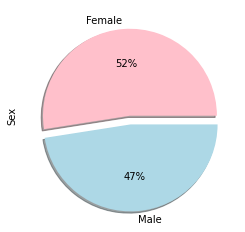

In [18]:
heart_disease_df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct=lambda x: str(x)[:2] + '%', shadow =True , colors=('pink','lightblue'))
plt.show()

Heart Disease distribution and Asthma

In [19]:
#HeartDisease_Asthma_people =heart_disease_df.groupby('HeartDisease')['Asthma'].sum()
#HeartDisease_Asthma_people

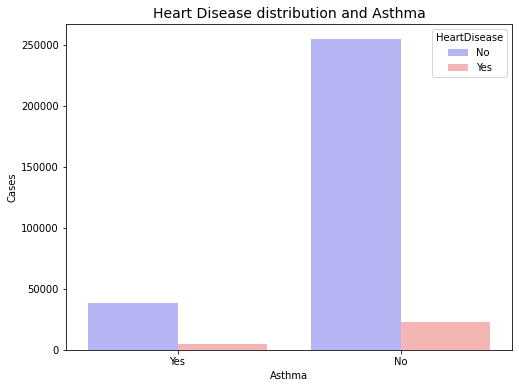

In [20]:
plt.figure(figsize=(8,6))
sb.countplot(data=heart_disease_df, x='Asthma', hue='HeartDisease', palette="bwr")
plt.title('Heart Disease distribution and Asthma', fontsize = 14)
plt.xlabel('Asthma')
plt.ylabel('Cases')
plt.show()

heart disease distribution based on Smoking

In [21]:
#HeartDisease_Smoking_people =heart_disease_df.groupby('HeartDisease')['Smoking'].sum()
#HeartDisease_Smoking_people

#HeartDisease_Smoking_people = heart_disease_df['Smoking'].value_counts(["HeartDisease"]=="Yes")
#HeartDisease_Smoking_people

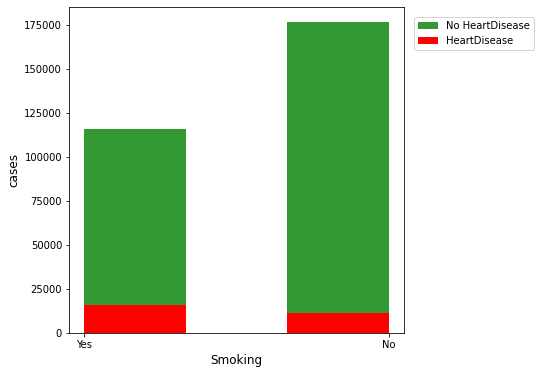

In [22]:
fig, ax = plt.subplots(figsize = (6,6))
ax.hist(heart_disease_df[heart_disease_df["HeartDisease"]=="No"]["Smoking"], bins=3, alpha=0.8, color="green", label="No HeartDisease")
ax.hist(heart_disease_df[heart_disease_df["HeartDisease"]=="Yes"]["Smoking"], bins=3, alpha=1, color="red", label="HeartDisease")
ax.set_xlabel("Smoking", fontsize = 12)
ax.set_ylabel("cases", fontsize = 12)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1.)
plt.show()

heart disease distribution based on AgeCategory

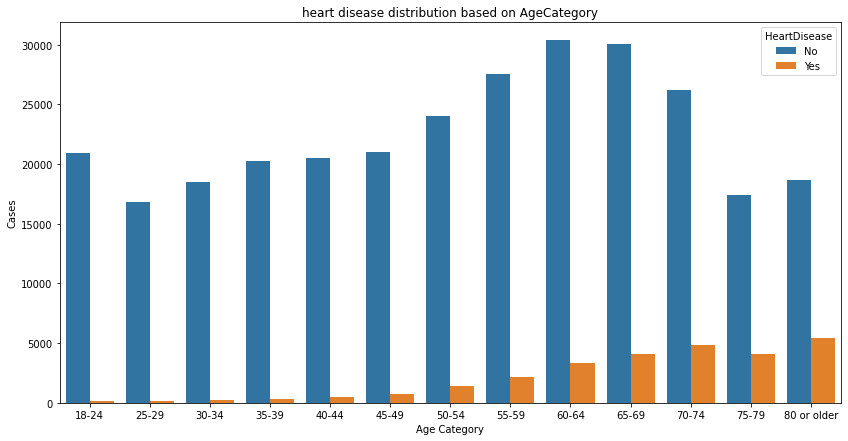

In [23]:
plt.figure(figsize=(14,7))
sb.countplot(data=heart_disease_df, x='AgeCategory', hue='HeartDisease', order=['18-24', '25-29', '30-34', '35-39', '40-44',
                                                                      '45-49', '50-54', '55-59', '60-64', '65-69',
                                                                      '70-74', '75-79', '80 or older'])
plt.title('heart disease distribution based on AgeCategory')
plt.xlabel('Age Category')
plt.ylabel('Cases')
plt.show()

Disease frequency based on Age Category

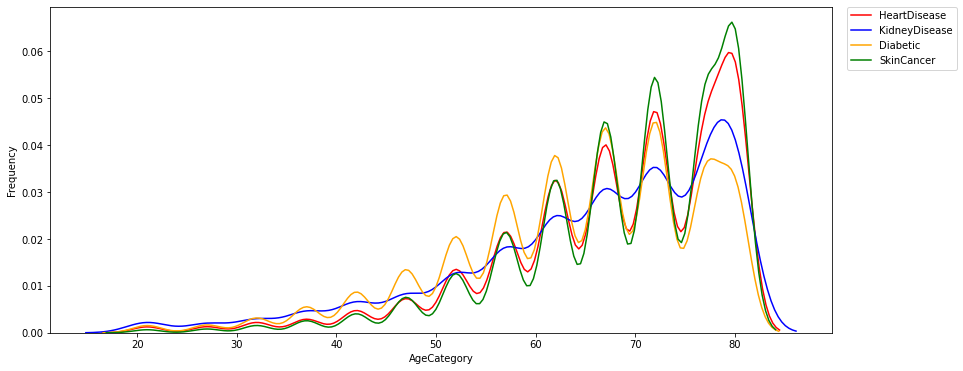

In [24]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
heart_disease_df['AgeCategory'] = heart_disease_df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
heart_disease_df['AgeCategory'] = heart_disease_df['AgeCategory'].astype('float')

fig, ax = plt.subplots(figsize = (14,6))
sb.kdeplot(heart_disease_df[heart_disease_df["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="red", label="HeartDisease", ax = ax)
sb.kdeplot(heart_disease_df[heart_disease_df["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="blue", label="KidneyDisease", ax = ax)
sb.kdeplot(heart_disease_df[heart_disease_df["Diabetic"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="orange", label="Diabetic", ax = ax)
sb.kdeplot(heart_disease_df[heart_disease_df["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="green", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

BMI and heart disease

In [25]:
#heart_disease_df.describe()

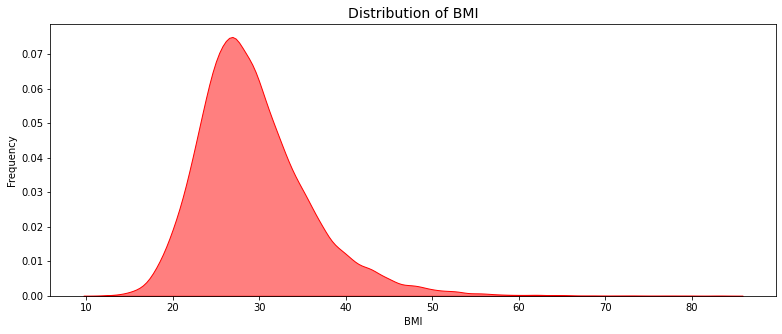

In [26]:
fig, ax = plt.subplots(figsize = (13,5))

sb.kdeplot(heart_disease_df[heart_disease_df["HeartDisease"]=="Yes"]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
plt.title('Distribution of BMI', fontsize = 14)

ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")

plt.show()

heart disease distribution based on Race

In [27]:
race_dist = heart_disease_df['Race'].value_counts(["HeartDisease"]=="Yes")
race_dist

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [28]:
#Race_groupby =heart_disease_df.groupby('Race')['HeartDisease'].sum()
#Race_groupby

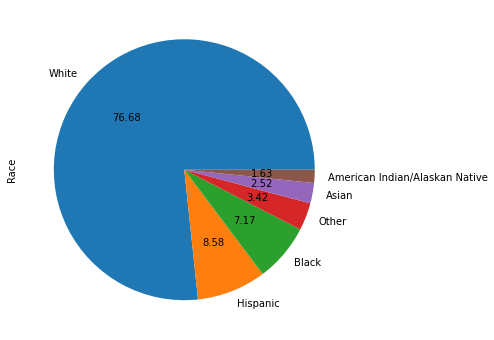

In [29]:
race_dis = heart_disease_df['Race'].value_counts(["HeartDisease"]=="Yes")
race_dis.plot(kind='pie', autopct='%.2f', figsize=(6, 6))

heart disease distribution based on Gen Health

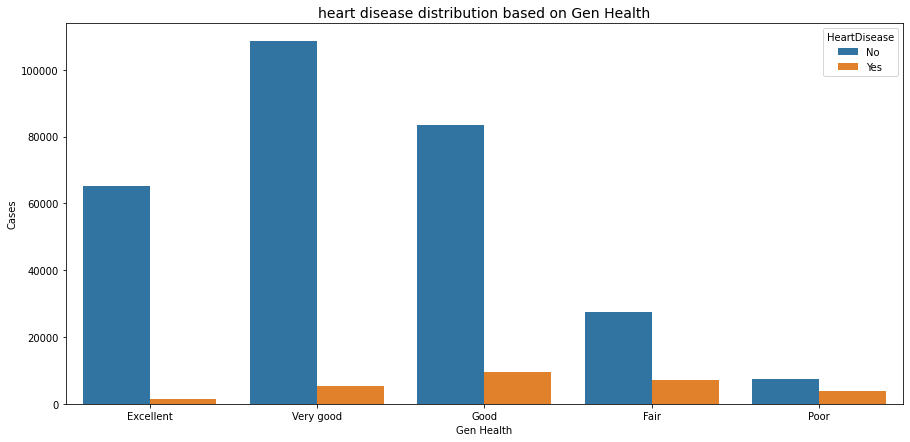

In [30]:
plt.figure(figsize=(15,7))
sb.countplot(data=heart_disease_df, x='GenHealth', hue='HeartDisease', order=['Excellent', 'Very good', 'Good',
                                                                              'Fair', 'Poor'])
plt.title('heart disease distribution based on Gen Health', fontsize = 14)
plt.xlabel('Gen Health')
plt.ylabel('Cases')
plt.show()

#encoding

In [31]:
print('\nCategorical Columns\n')
heart_disease_df.select_dtypes(include=['O']).nunique()


Categorical Columns



HeartDisease        2
Smoking             2
AlcoholDrinking     2
Stroke              2
DiffWalking         2
Sex                 2
Race                6
Diabetic            4
PhysicalActivity    2
GenHealth           5
Asthma              2
KidneyDisease       2
SkinCancer          2
dtype: int64

binary categorical

In [32]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  float64
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [33]:
heart_disease_df['Smoking'] = pd.Series(np.where(heart_disease_df['Smoking'] == 'Yes', 1, 0))
heart_disease_df['AlcoholDrinking'] = pd.Series(np.where(heart_disease_df['AlcoholDrinking'] == 'Yes', 1, 0))
heart_disease_df['Stroke'] = pd.Series(np.where(heart_disease_df['Stroke'] == 'Yes', 1, 0))
heart_disease_df['DiffWalking'] = pd.Series(np.where(heart_disease_df['DiffWalking'] == 'Yes', 1, 0))
heart_disease_df['PhysicalActivity'] = pd.Series(np.where(heart_disease_df['PhysicalActivity'] == 'Yes', 1, 0))
heart_disease_df['Asthma'] = pd.Series(np.where(heart_disease_df['Asthma'] == 'Yes', 1, 0))
heart_disease_df['KidneyDisease'] = pd.Series(np.where(heart_disease_df['KidneyDisease'] == 'Yes', 1, 0))
heart_disease_df['SkinCancer'] = pd.Series(np.where(heart_disease_df['SkinCancer'] == 'Yes', 1, 0))
heart_disease_df['HeartDisease'] = pd.Series(np.where(heart_disease_df['HeartDisease'] == 'Yes', 1, 0))

In [34]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  float64
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

for more than 2 value

In [35]:
le = LabelEncoder()
heart_disease_df['Sex']=le.fit_transform(heart_disease_df['Sex'])
heart_disease_df['AgeCategory']=le.fit_transform(heart_disease_df['AgeCategory'])
heart_disease_df['Race']=le.fit_transform(heart_disease_df['Race'])
heart_disease_df['Diabetic']=le.fit_transform(heart_disease_df['Diabetic'])
heart_disease_df['GenHealth']=le.fit_transform(heart_disease_df['GenHealth'])

In [36]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f790d2cf490>,
      dtype=object)

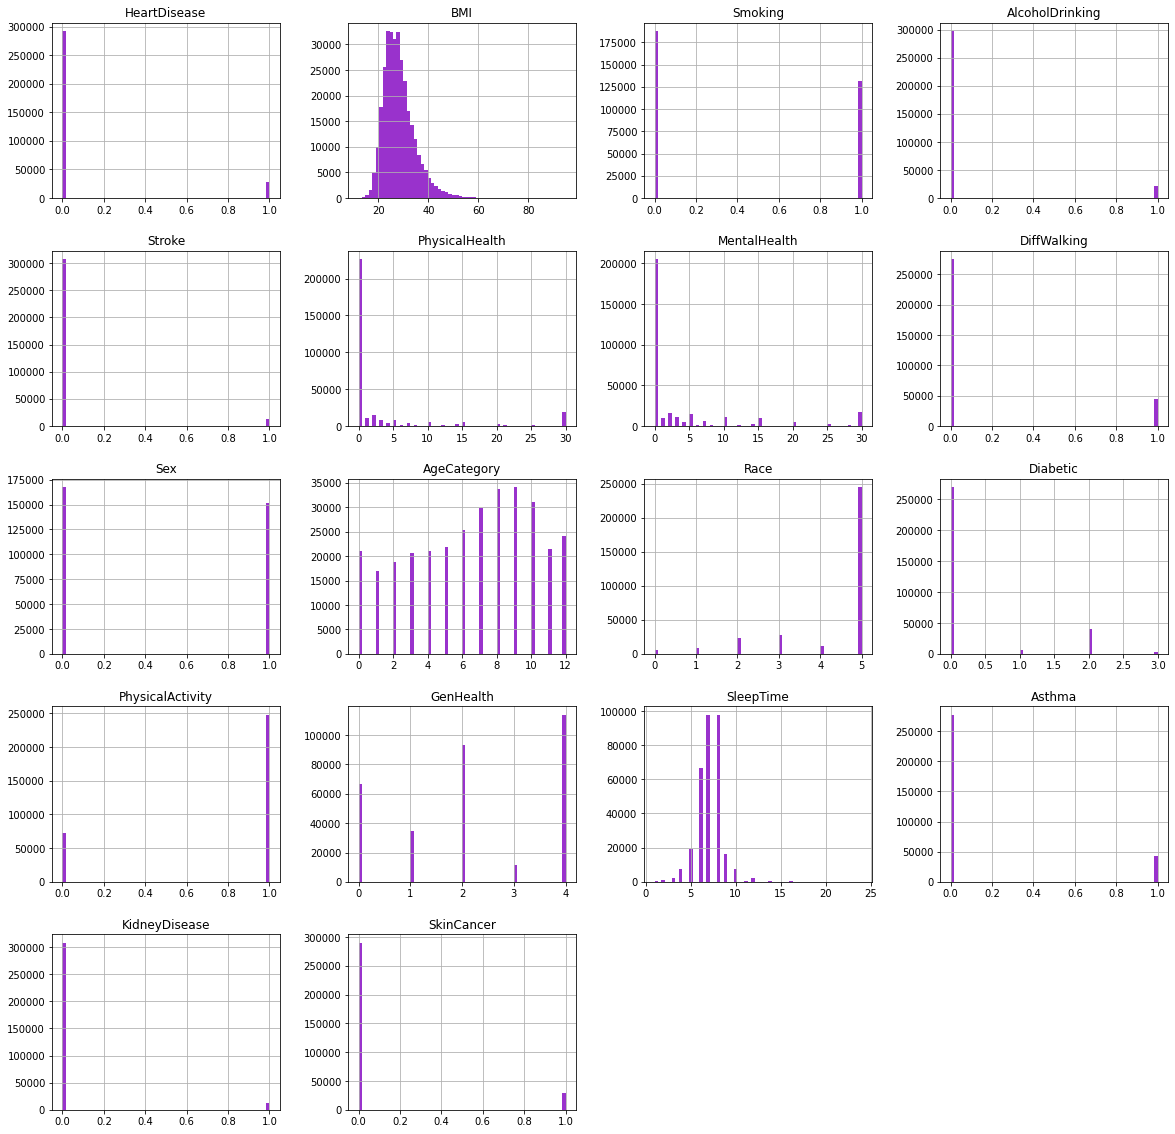

In [37]:
heart_disease_df.hist(bins = 60, figsize = (20 ,20) , color="DARKORCHID")

#Correlation

In [38]:
heart_disease_df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


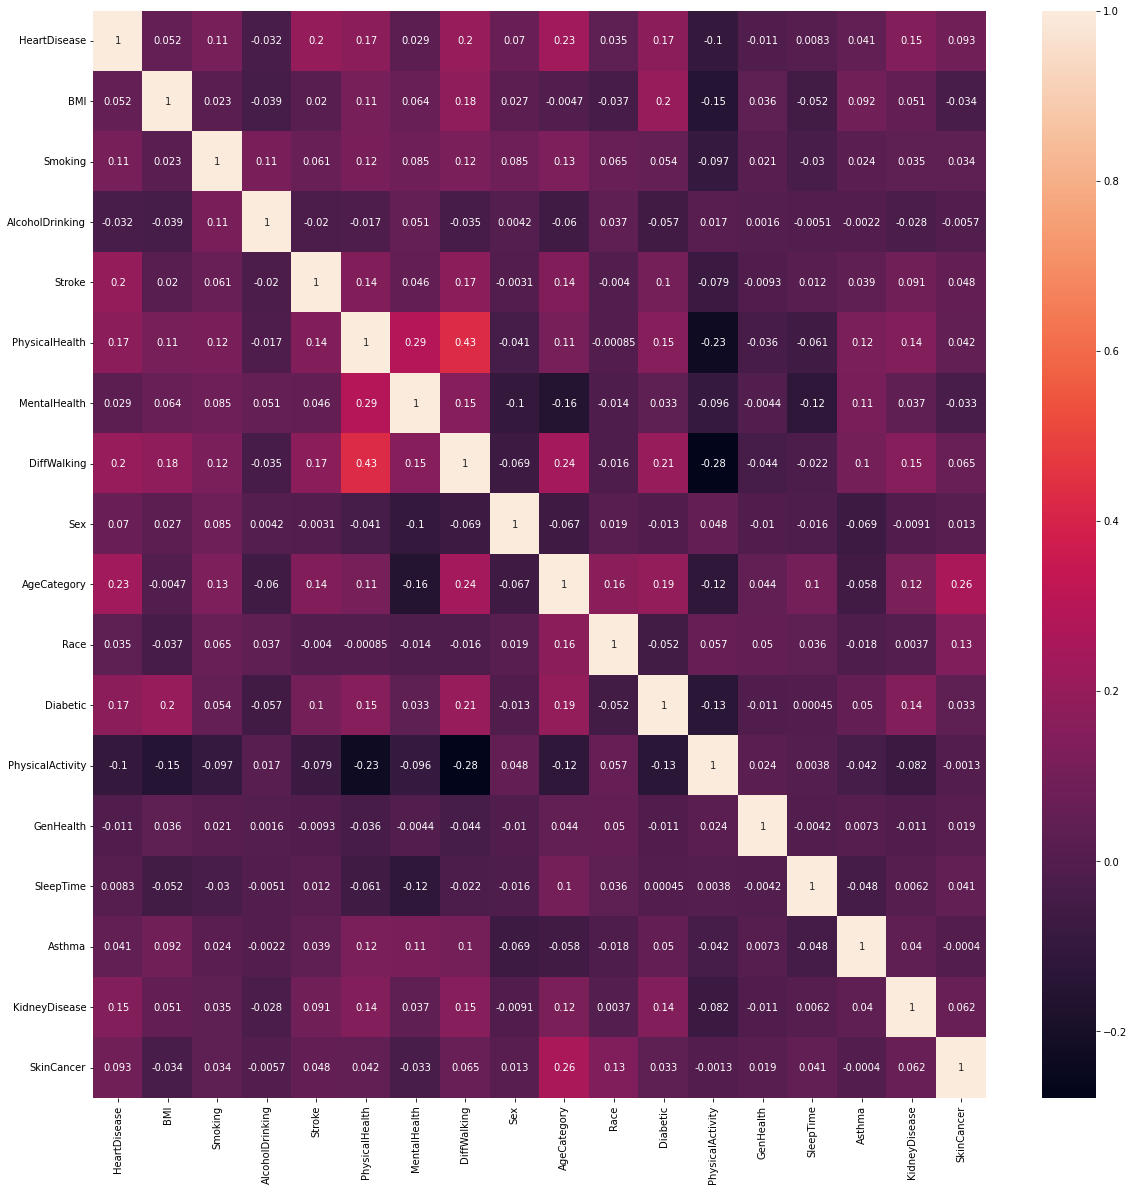

In [39]:
plt.figure(figsize = (20,20))
sb.heatmap(heart_disease_df.corr(), annot = True)
plt.show()

In [40]:
heart_disease_df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,10,5,0,1,1,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,5,2,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,12,5,1,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,9,5,0,1,2,10.0,0,0,0


In [41]:
heart_disease_df.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319785,0,31.93,0,1,0,0.0,0.0,0,1,9,3,0,1,2,7.0,0,0,0
319786,1,33.20,1,0,0,0.0,0.0,0,0,8,3,2,1,4,8.0,1,0,0
319787,0,36.54,0,0,0,7.0,0.0,0,1,2,3,0,0,2,9.0,0,0,0
319788,0,23.38,0,0,0,0.0,0.0,0,0,8,3,0,1,0,6.0,0,0,0
319789,0,22.22,0,0,0,0.0,0.0,0,0,0,3,0,1,0,8.0,0,0,0
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0
319794,0,46.56,0,0,0,0.0,0.0,0,0,12,3,0,1,2,8.0,0,0,0


In [42]:
heart_disease_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Pair Plot

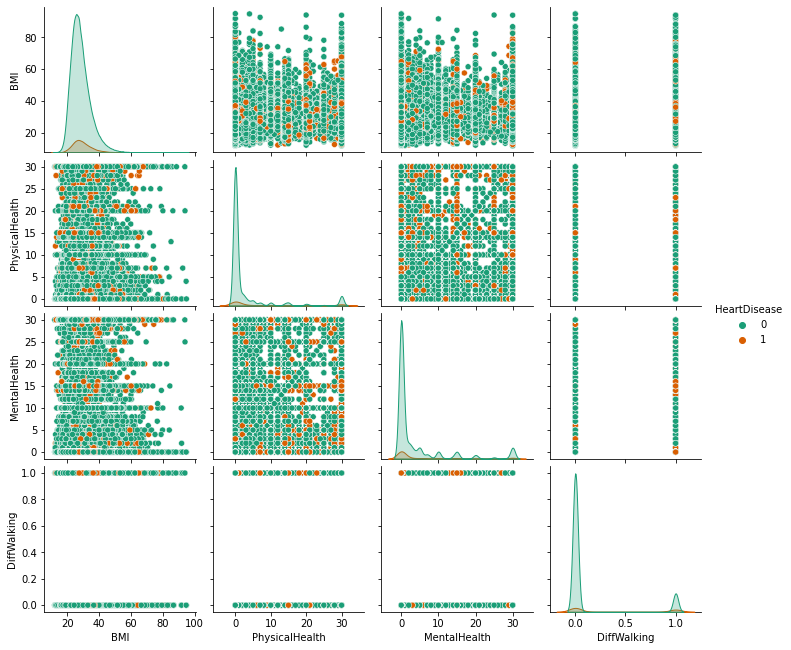

In [43]:
sb.pairplot(heart_disease_df, hue = 'HeartDisease', vars = ['BMI','PhysicalHealth', 'MentalHealth','DiffWalking'] , palette='Dark2' )
plt.subplots_adjust(top=0.9)
plt.show();

# Remove extra columns

In [44]:
heart_disease_df.drop(['AlcoholDrinking','GenHealth','PhysicalActivity'],axis=1,inplace=True)


In [45]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   HeartDisease    319795 non-null  int64  
 1   BMI             319795 non-null  float64
 2   Smoking         319795 non-null  int64  
 3   Stroke          319795 non-null  int64  
 4   PhysicalHealth  319795 non-null  float64
 5   MentalHealth    319795 non-null  float64
 6   DiffWalking     319795 non-null  int64  
 7   Sex             319795 non-null  int64  
 8   AgeCategory     319795 non-null  int64  
 9   Race            319795 non-null  int64  
 10  Diabetic        319795 non-null  int64  
 11  SleepTime       319795 non-null  float64
 12  Asthma          319795 non-null  int64  
 13  KidneyDisease   319795 non-null  int64  
 14  SkinCancer      319795 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 36.6 MB


In [46]:
heart_disease_df.describe()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,24.000000,1.000000,1.000000,1.000000


In [47]:
heart_disease_df.tail(10)

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,SleepTime,Asthma,KidneyDisease,SkinCancer
319785,0,31.93,0,0,0.0,0.0,0,1,9,3,0,7.0,0,0,0
319786,1,33.20,1,0,0.0,0.0,0,0,8,3,2,8.0,1,0,0
319787,0,36.54,0,0,7.0,0.0,0,1,2,3,0,9.0,0,0,0
319788,0,23.38,0,0,0.0,0.0,0,0,8,3,0,6.0,0,0,0
319789,0,22.22,0,0,0.0,0.0,0,0,0,3,0,8.0,0,0,0
319790,1,27.41,1,0,7.0,0.0,1,1,8,3,2,6.0,1,0,0
319791,0,29.84,1,0,0.0,0.0,0,1,3,3,0,5.0,1,0,0
319792,0,24.24,0,0,0.0,0.0,0,0,5,3,0,6.0,0,0,0
319793,0,32.81,0,0,0.0,0.0,0,0,1,3,0,12.0,0,0,0
319794,0,46.56,0,0,0.0,0.0,0,0,12,3,0,8.0,0,0,0


#PREDICTION

In [48]:
features = heart_disease_df[['BMI', 'Smoking', 'Stroke','PhysicalHealth','MentalHealth',
                             'DiffWalking', 'Sex', 'AgeCategory','SleepTime', 'Asthma', 
                             'KidneyDisease','SkinCancer','Race', 'Diabetic']]

labels = heart_disease_df['HeartDisease']

In [49]:
train_heart_disease_df = heart_disease_df[:int(len(heart_disease_df)*0.7)]
valid_heart_disease_df= heart_disease_df[int(len(heart_disease_df)*0.7):]

In [50]:
print('\nData in Train:')
print(train_heart_disease_df['HeartDisease'].value_counts())

print('\nData in Valid:')
print(valid_heart_disease_df['HeartDisease'].value_counts())


Data in Train:
0    204660
1     19196
Name: HeartDisease, dtype: int64

Data in Valid:
0    87762
1     8177
Name: HeartDisease, dtype: int64


In [51]:
class_0 =train_heart_disease_df[train_heart_disease_df['HeartDisease'] == 0]
class_1 =train_heart_disease_df[train_heart_disease_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train_heart_disease_df = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(train_heart_disease_df['HeartDisease'].value_counts())

Data in Train:
0    204660
1    204660
Name: HeartDisease, dtype: int64


In [67]:
class_0 = valid_heart_disease_df[valid_heart_disease_df['HeartDisease'] == 0]
class_1 = valid_heart_disease_df[valid_heart_disease_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
valid_heart_disease_df = pd.concat([class_0, class_1], axis=0)
print('Data in Test:')
print(valid_heart_disease_df['HeartDisease'].value_counts())

Data in Test:
0    87762
1    87762
Name: HeartDisease, dtype: int64


In [53]:
x_train = np.array(train_heart_disease_df[['BMI', 'Smoking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer','Race','Diabetic']])
y_train = np.array(train_heart_disease_df['HeartDisease'])

x_valid = np.array(valid_heart_disease_df[['BMI', 'Smoking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race','Diabetic']])
y_valid = np.array(valid_heart_disease_df['HeartDisease'])

Models

In [54]:
#RandomForestClassifier
model= RandomForestClassifier().fit(x_train, y_train)


In [55]:
#RandomForestClassifier Report
y_pred = model.predict(x_valid)

print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     87762
           1       0.25      0.21      0.23      8177

    accuracy                           0.88     95939
   macro avg       0.59      0.58      0.58     95939
weighted avg       0.87      0.88      0.87     95939



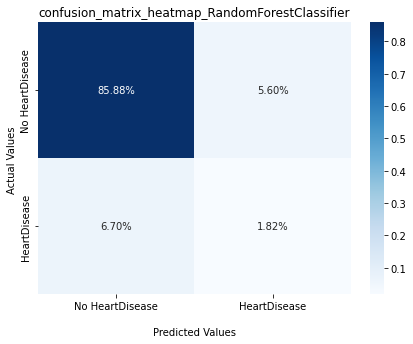

In [56]:
cf_matrix = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(7,5))

ax = sb.heatmap(cf_matrix/np.sum(cf_matrix),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.title('confusion_matrix_heatmap_RandomForestClassifier')
plt.show()

In [57]:
#GaussianNB
model = GaussianNB()
model.fit(x_train , y_train)

GaussianNB()

In [58]:
y_pred = model.predict(x_valid)
sum(y_pred == y_valid) / len(y_pred)

0.8001646879788199

In [59]:
accuracy_score(y_valid, y_pred)

0.8001646879788199

In [60]:
# GaussianNB Report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     87762
           1       0.23      0.58      0.33      8177

    accuracy                           0.80     95939
   macro avg       0.59      0.70      0.61     95939
weighted avg       0.89      0.80      0.84     95939



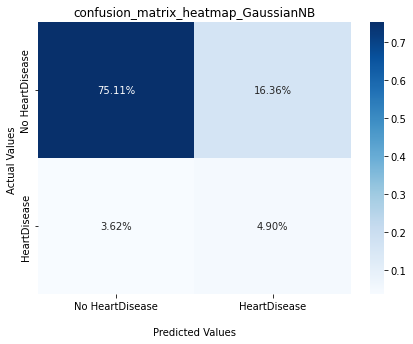

In [61]:
cf_matrix = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(7,5))

ax = sb.heatmap(cf_matrix/np.sum(cf_matrix),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.title('confusion_matrix_heatmap_GaussianNB')
plt.show()

In [62]:
#clasification 3 Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train , y_train)

DecisionTreeClassifier()

In [63]:
y_pred = model.predict(x_valid)
sum(y_pred == y_valid) / len(y_pred)

0.8562836802551621

In [64]:
accuracy_score(y_valid, y_pred)

0.8562836802551621

In [65]:
#clasification 3 Decision Tree Report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     87762
           1       0.19      0.22      0.20      8177

    accuracy                           0.86     95939
   macro avg       0.56      0.57      0.56     95939
weighted avg       0.86      0.86      0.86     95939



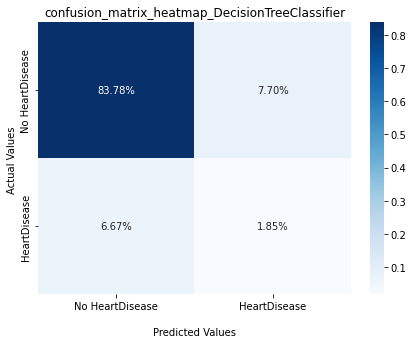

In [66]:
cf_matrix = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(7,5))

ax = sb.heatmap(cf_matrix/np.sum(cf_matrix),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.title('confusion_matrix_heatmap_DecisionTreeClassifier')
plt.show()